# Assignment 5 - Machine  Learning
## Artificial Neural  Networks

In [1]:
import scipy.io
import warnings
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from ANN import ANN
from displayData import displayData

In [2]:
# suppress runtime warnings
warnings.filterwarnings("ignore")

In [2]:
# Setup the parameters you will use for this exercise
n_in = 400  # 20x20 Input Images of Digits
n_hidden = 25  # 25 hidden units
n_out= 10  # 10 labels, from 0 to 9

def init_data():
    mat = scipy.io.loadmat('digitdata.mat')
    X = mat['X']
    Y = mat['y']
    Y = np.squeeze(Y)
    m, _ = np.shape(X)
    sel = np.random.choice(range(X.shape[0]), 100)
    sel = X[sel, :]
    displayData(sel)
    return X,Y

**Description of the network**

The network receives an input which is a vector of size [400] which are the images (20 x 20) pixels squeezed into
a single dimension vector.
Given that the hidden layer size is 25 from parameters, the size of the input weight will be [400 x 25].
We want to classify this vector input into a single label (0,9), and therefore the output vector will encode the
prediction of the network in the form of a size [10] vector expecting 1 at position $output_{i-1}$ if i-1 is the digit
given as target, elsewhere 0.
Hence, the size of the output weights, given that a single hidden layer of size [25] is implemented, will be
[25 x 10]. The mapping looks like:  in > (400 -> 25) > hidden > (25 -> 10) > out

Initializing Neural Network Parameters ...
Loading and Visualizing Data ...


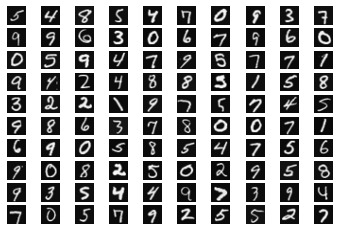

If your backpropagation implementation is correct, then 
 the relative difference will be small (less than 1e-9). 
 
Relative Difference:  2.2975381795762613e-11
If your backpropagation implementation is correct, then 
 the relative difference will be small (less than 1e-9). 
 
Relative Difference:  2.216043968879162e-11
Cost (w/ lambda = 10):	 0.5760512469501331 (expected 0.576051)


In [4]:
print('Initializing Neural Network Parameters ...')
network = ANN(n_in, n_hidden, n_out, random=False)
print('Loading and Visualizing Data ...')
[x, y] = init_data()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=10)
network.set_data(x, y)
network.debug(False)  # will print the relative difference
# set to true to print the two gradients arrays

**Impact of specific parameters such as $\lambda$, number of iterations, weight initialization, etc.**

In [5]:
training_accuracies = []
testing_accuracies = []
cost=[]

def test_network(max_it, lambda_value, random):
    network.reset(random=random)
    network.train(max_it, lambda_value, debug=False)
    return network.prediction_accuracy(), network.prediction_accuracy(x_test, y_test), network.cost[0]

test = lambda it,lambda_,random : test_network(it,lambda_,random)

def test_lambda(max_it, _lambda):
    print(f'Testing lambda = {_lambda}, max iterations = {max_it}')
    acc_tr, acc_te, c_ = test(max_it, _lambda, random=True)
    training_accuracies.append(acc_tr)
    testing_accuracies.append(acc_te)
    cost.append(c_)
    print(f'Training accuracy : {acc_tr}')
    print(f'Testing accuracy : {acc_te}')
    return


In [6]:
print('Training Neural Network with loaded weights')
network.set_data(x_train, y_train)
max_iterations = 200
acc_train, acc_test,  cost_ = test(max_iterations, lambda_=0, random=False)
print(f'Training accuracy : {acc_train}')
print(f'Testing accuracy : {acc_test}')

Training Neural Network with loaded weights
Training accuracy : 100.0
Testing accuracy : 94.29747207524986


Training Neural Network with random weights
Testing lambda = 0, max iterations = 150
Training accuracy : 99.90906335253106
Testing accuracy : 91.41681363903587
Testing lambda = 1, max iterations = 150
Training accuracy : 99.09063352531071
Testing accuracy : 92.53380364491476
Testing lambda = 2, max iterations = 150
Training accuracy : 97.75689602909972
Testing accuracy : 92.29864785420341
Testing lambda = 3, max iterations = 150
Training accuracy : 97.05971506517126
Testing accuracy : 91.53439153439153
Testing lambda = 4, max iterations = 150
Training accuracy : 95.99878751136708
Testing accuracy : 91.59318048206937
Testing lambda = 5, max iterations = 150
Training accuracy : 95.36223097908457
Testing accuracy : 91.24044679600235
Testing lambda = 10, max iterations = 150
Training accuracy : 93.57381024552895
Testing accuracy : 90.24103468547912


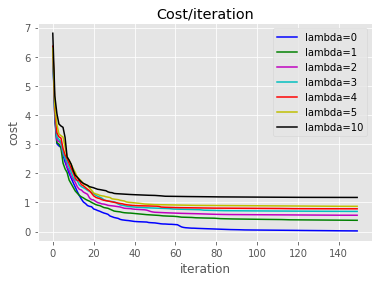

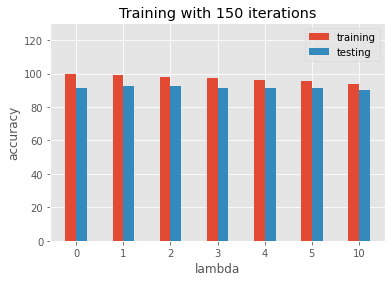

In [7]:
print('Training Neural Network with random weights')
max_iterations = 150
x_ = [k for k in range(0,max_iterations)]
for i in range(0,4):
    test_lambda(max_iterations, i)
test_lambda(max_iterations, 4)
test_lambda(max_iterations, 5)
test_lambda(max_iterations, 10)

plt.style.use('ggplot')

plt.plot(x_, cost[0], 'b-')
plt.plot(x_, cost[1], 'g-')
plt.plot(x_, cost[2], 'm-')
plt.plot(x_, cost[3], 'c-')
plt.plot(x_, cost[4], 'r-')
plt.plot(x_, cost[5], 'y-')
plt.plot(x_, cost[6], 'k-')


plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("Cost/iteration")

plt.legend([f'lambda={i}' for i in [0,1,2,3,4,5,10]])
plt.show()
ind = np.arange(7)
width = 0.23
plt.bar(ind, training_accuracies,width, label='training')
plt.bar(ind+width, testing_accuracies ,width, label='testing')
plt.ylabel('accuracy')
plt.xlabel('lambda')
plt.ylim((0,130))
plt.title(f'Training with {max_iterations} iterations')
plt.xticks(ind + width / 2, ('0','1','2','3','4','5','10'))
plt.legend(loc='best')
plt.show()

**How does the regularization affect the training of your ANN?**
As we can see the Ann performed better without regularization on the training set,
as the cost was approaching 0 faster, and eventually
getting really close to 0.
We can also see the network predicted correctly all instances getting slightly worse with higher lambdas.
However, one could test if the accuracy of predictions on the testing set increases when setting higher lambda values.

**Imagine  that  you  want  to  use  a  similar  solution  to  classify  50x50  pixel  grayscale  images  containing  letters
(consider  an  alphabet  with  26  letters).  Which  changes  would  you  need  in  the  current  code  in  order  to
implement this classification task?**

We would only need to change the number of inputs (which will then be 2500 + bias)  and the number of outputs
which will be 26.
Hence, given H = nHidden + bias , need to initialize back
the weights with dimensions T1:[2501 x H] , T2:[H x 26]

**Did you manage to improve the initial results (using values in debugweights.mat)? Which was your best result?
How did you configure the system? How could you improve them even more?**

The network got to an accuracy of 100 on the training set which is better than 97.52
just by iterating 200 times instead of 150 with lambda = 0

**Change the value of the variable show_examples (in the python version, run the relevant block in the Jupyter
one) in ex_nn, which information is provided? Did you get the expected information? Is anything unexpected
there?**

The network is predicting correctly the given input images.

**How does your sigmoidGradient function work? Which is the return value for different values of z? How does
it works with the input is a vector and with it is a matrix?**

sigmoidGradients works fine with int, float, list, list[list], np.array types.

It returns the derivative of the sigmoid function applied at each value


In [12]:
n_hidden = 60
network = ANN(n_in, n_hidden,  n_out, random=True)
network.set_data(x_train,y_train)
network.train(max_iter=200,lambda_value=2,debug=False)
accuracy = network.prediction_accuracy(x_test,y_test)
print(accuracy) # highest accuracy on testing set

93.12169312169311


D:\PYTHON\MachineLearning\lab5\Jupyter\Initial code\displayData.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.sqrt(data.shape[0]), np.sqrt(data.shape[0]), i + 1)


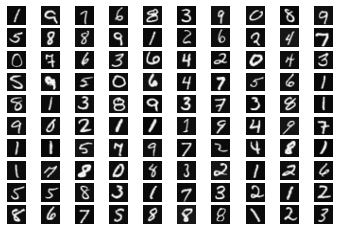

(10025,)
(260,)
If your backpropagation implementation is correct, then 
 the relative difference will be small (less than 1e-9). 
 
Relative Difference:  2.2975381795762613e-11
If your backpropagation implementation is correct, then 
 the relative difference will be small (less than 1e-9). 
 
Relative Difference:  2.216043968879162e-11
Cost (w/ lambda = 10):	 0.7224651217771314 (expected 0.576051)
10.0138550440253


In [9]:
[x, y] = init_data()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=10)
network = ANN(n_in,n_hidden,n_out,True)
print(network.t1.shape)
print(network.t2.shape)
network.set_data(x_train,y_train)

network.debug(False)

print(network.prediction_accuracy())